<a href="https://colab.research.google.com/github/Munniz1309/prev_bitcoin_SVR/blob/main/prev_bitcoin_support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

In [2]:
# Usando o Yahoo Finance para baixar os dados históricos do Bitcoin (BTC-USD)
dados = yf.download('BTC-USD', start='2014-01-01', end='2024-11-11')

# Pré-processamento de dados
dados = dados[['Close']]

[*********************100%***********************]  1 of 1 completed


In [3]:
# Padronização dos dados para melhorar a performance do modelo
padronizador = StandardScaler()
dados = padronizador.fit_transform(dados)

In [4]:
dados

array([[-0.88842045],
       [-0.89003742],
       [-0.89149463],
       ...,
       [ 2.85184467],
       [ 2.86331746],
       [ 3.04496833]])

Modelo SVR com C=1 e epsilon=0.5: MSE=0.5096, R²=0.3212


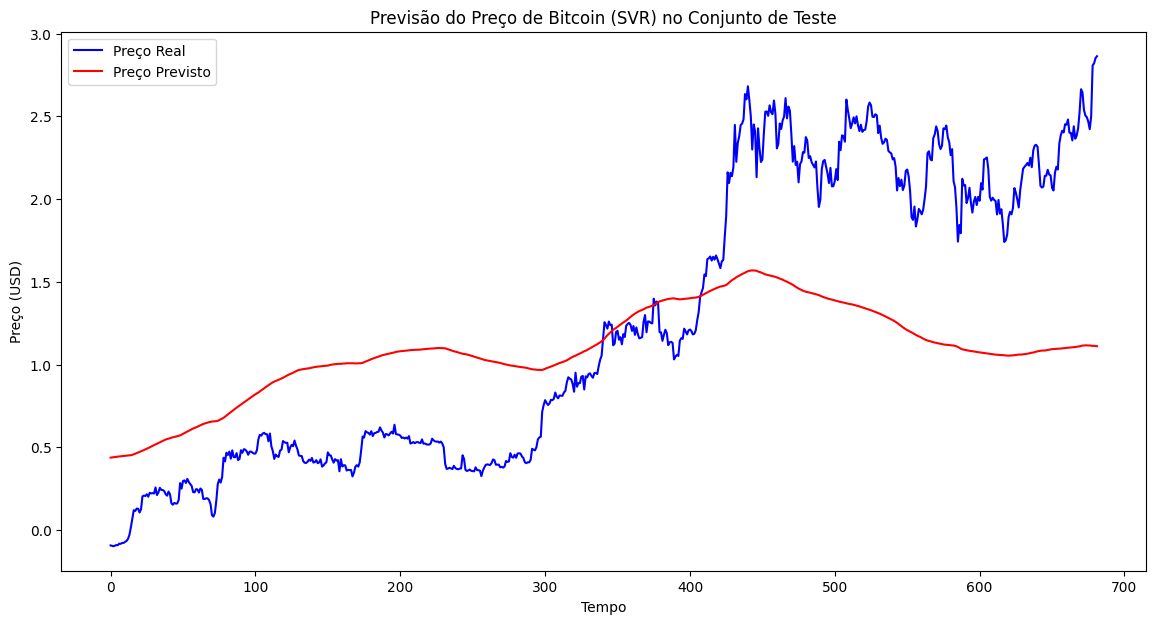

In [5]:
# Padronização (média 0, desvio padrão 1)
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados)

# Função para criar os dados de entrada e saída
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Definir o número de passos de tempo
time_step = 300

# Criar os dados de treino e teste
X, y = create_dataset(dados_scaled, time_step)

# Dividir os dados em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Teste com o modelo SVR e ajuste de parâmetros
model = SVR(kernel='rbf', C=1, epsilon=0.55)
model.fit(X_train, y_train)

# Previsões com o modelo
y_pred = model.predict(X_test)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Modelo SVR com C=1 e epsilon=0.5: MSE={mse:.4f}, R²={r2:.4f}")

# Inverter a padronização dos dados
predicted_price = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualizar os resultados do conjunto de teste
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, color='blue', label='Preço Real')
plt.plot(predicted_price, color='red', label='Preço Previsto')
plt.title('Previsão do Preço de Bitcoin (SVR) no Conjunto de Teste')
plt.xlabel('Tempo')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()